In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("cleaned_data.csv")
cleaned_data = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59457 entries, 0 to 59456
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         59457 non-null  int64  
 1   City                       59457 non-null  object 
 2   PostalCode                 59457 non-null  int64  
 3   Region                     59457 non-null  object 
 4   District                   59457 non-null  object 
 5   Province                   59457 non-null  object 
 6   PropertyType               59457 non-null  object 
 7   PropertySubType            59457 non-null  object 
 8   Price                      59457 non-null  float64
 9   ConstructionYear           38208 non-null  float64
 10  BedroomCount               59457 non-null  int64  
 11  LivingArea                 59457 non-null  float64
 12  KitchenType                35729 non-null  object 
 13  Furnished                  59457 non-null  int

In [3]:
data["PropertyType"].unique()

array(['House', 'Apartment'], dtype=object)

Variables are related: LivingArea, BedroomCount, Location (latidude, Longitude), PropertySubType, PopulationDensisity, EneryConsumption/m2

We want to what the effect on the bedroomCount on Price and Livingarea, therefor we make a scatterplot

NameError: name 'axes' is not defined

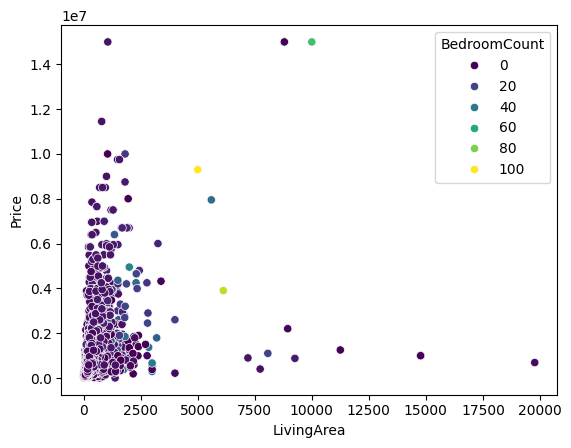

In [4]:
#import moduls:
from matplotlib.ticker import FuncFormatter #need to format the price into xxxk

#import data as Dataframe:
model_data = pd.read_csv('cleaned_data.csv')
data = pd.DataFrame(model_data)

#Filtering the data between houses and apartment (to check for differences)
houses_data = data[data['PropertyType'] == 'House']
apartments_data = data[data['PropertyType'] == 'Apartment']

#define a object to change price from 250000 to 250k: more readable
# def price_formatter(x, pos):
#     return f'{x/1000:.0f}k'
# formatter = FuncFormatter(price_formatter)

#visualization:
#creating 2 plots separated:
# fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

#houses
sns.scatterplot(data=houses_data, x='LivingArea', y='Price', hue='BedroomCount',palette='viridis')
axes[0].set_xlabel('Living Area')
axes[0].set_ylabel('Price')
axes[0].set_title('Houses: Price vs Living Area (colored by Bedroom Count)')
#axes[0].yaxis.set_major_formatter(formatter)

#apartments
# sns.scatterplot(data=apartments_data, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis', ax=axes[1])
# axes[1].set_xlabel('Living Area')
# axes[1].set_ylabel('Price')
# axes[1].set_title('Apartments: Price vs Living Area (colored by Bedroom Count)')
#axes[1].yaxis.set_major_formatter(formatter)

#apply formatter on y-axis on the pric:
# formatter = FuncFormatter(price_formatter)
# plt.gca().yaxis.set_major_formatter(formatter)



#END:
plt.legend(title='BedroomCount', loc='upper right')
plt.show()


HOUSES

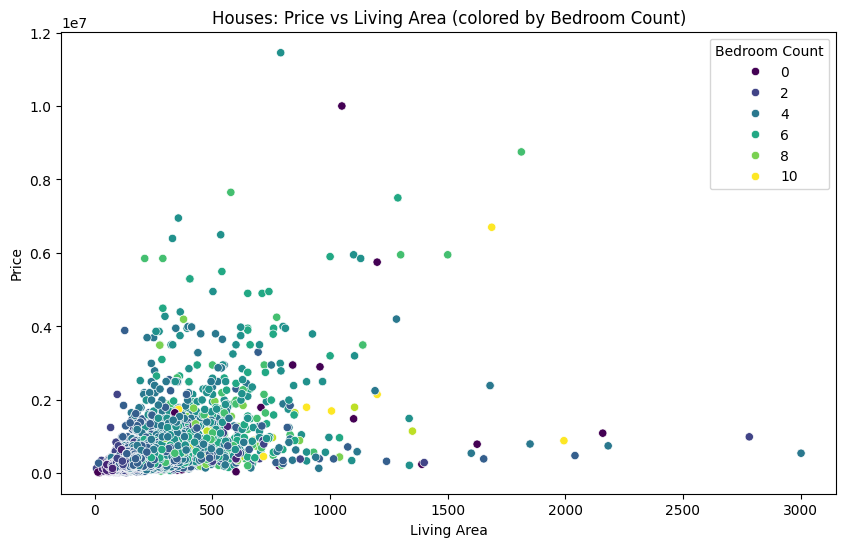

In [ ]:
#import data as Dataframe:
model_data = pd.read_csv('cleaned_data.csv')
data = pd.DataFrame(model_data)

#Filtering the data between houses and apartment (to check for differences)
houses_data = data[data['PropertySubType'] == 'House']
house_data_filtered = houses_data[(houses_data['LivingArea'] <= 4000) & (houses_data['BedroomCount'] <= 10)]

#house from subtype
house_data = data[data['PropertySubType'] == 'House']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_data_filtered, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Houses: Price vs Living Area (colored by Bedroom Count)')
plt.legend(title='Bedroom Count', loc='upper right')
plt.show()


Remove outliers from houses

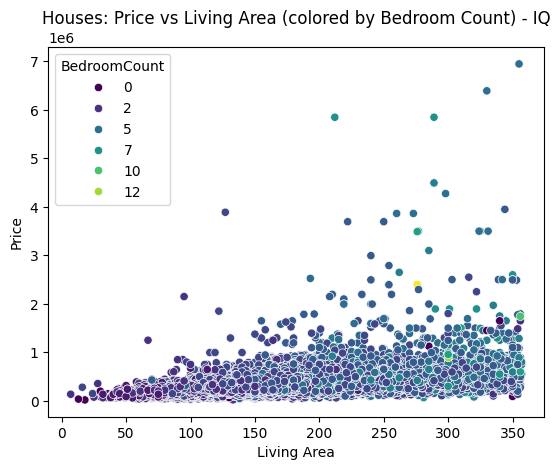

In [13]:
#plotmodel with IQ def
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
model_data = remove_outliers(cleaned_data, 'LivingArea')
data_houses = model_data[model_data['PropertySubType'] == 'House']

sns.scatterplot(data=data_houses, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Houses: Price vs Living Area (colored by Bedroom Count) - IQ')


#show plot
plt.show()

APARTMENT

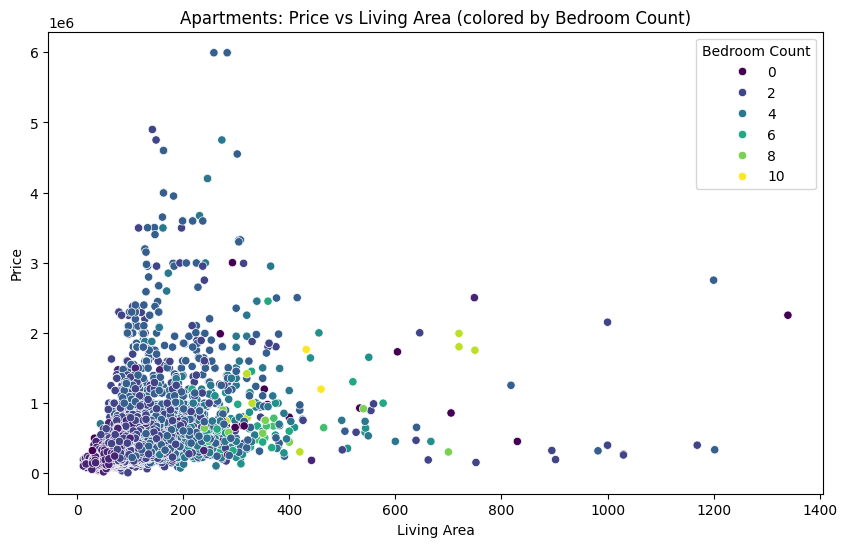

In [ ]:
apartments_data = data[data['PropertySubType'] == 'Apartment']
apartments_data_filtered = apartments_data[(apartments_data['LivingArea'] <= 2000) & (apartments_data['BedroomCount'] <= 10)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=apartments_data_filtered, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Apartments: Price vs Living Area (colored by Bedroom Count)')
plt.legend(title='Bedroom Count', loc='upper right')
plt.show()

remove outliers from apartement

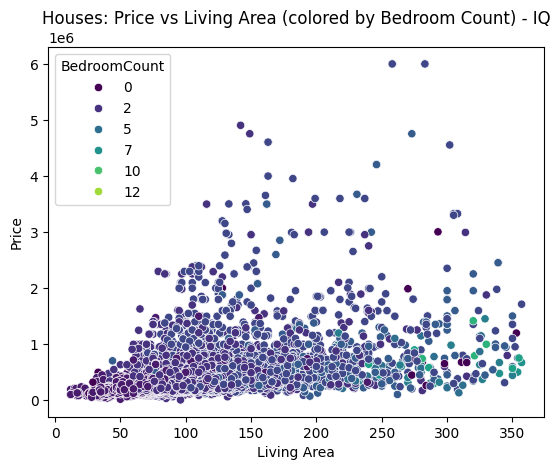

In [15]:
#plotmodel with IQ def
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
model_data = remove_outliers(cleaned_data, 'LivingArea')
data_apartments = model_data[model_data['PropertySubType'] == 'Apartment']

sns.scatterplot(data=data_apartments, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Houses: Price vs Living Area (colored by Bedroom Count) - IQ')


#show plot
plt.show()

NOT USABLE:

In [ ]:

#WITH OUTLIERS
#import data as Dataframe:
read_data = pd.read_csv('cleaned_data.csv')
data = pd.DataFrame(read_data)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)


#plotmodel without IQ def
houses_data = data[data['PropertySubType'] == 'House']
house_data_filtered = houses_data[(houses_data['LivingArea'] <= 4000) & (houses_data['BedroomCount'] <= 10)]
sns.scatterplot(data=house_data_filtered, x='LivingArea', y='Price', hue='BedroomCount', palette='viridis', ax=axes[0])

axes[0].set_xlabel('Living Area')
axes[0].set_ylabel('Price')
axes[0].set_title('Houses: Price vs Living Area (colored by Bedroom Count)')
# plt.legend(title='Bedroom Count', loc='upper right')
# plt.show()



